In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
print("Starting Weather Check")
print("-----------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

city_name = []
country = []
lat = []
long = []
date = []
temp = []
humidity = []
clouds = []
wind = []
record_counter=0
set_counter=1

for record, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url+city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        
        if record_counter > 49:
            record_counter = 0
            set_counter = set_counter + 1
       
        else:
            record_counter = record_counter + 1
        
        print(f"Processing Record {record_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City Not Found. Skipping...")
            
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Starting Weather Check
-----------------------
Processing Record 1 of Set 1 : bluff
Processing Record 2 of Set 1 : mataura
Processing Record 3 of Set 1 : arman
Processing Record 4 of Set 1 : yanam
Processing Record 5 of Set 1 : hilo
City Not Found. Skipping...
Processing Record 6 of Set 1 : puerto ayora
Processing Record 7 of Set 1 : ulaanbaatar
Processing Record 8 of Set 1 : sheopur
City Not Found. Skipping...
Processing Record 9 of Set 1 : beloha
Processing Record 10 of Set 1 : thompson
Processing Record 11 of Set 1 : qaanaaq
Processing Record 12 of Set 1 : saint-philippe
Processing Record 13 of Set 1 : punta arenas
Processing Record 14 of Set 1 : hobart
Processing Record 15 of Set 1 : hit
Processing Record 16 of Set 1 : barrow
Processing Record 17 of Set 1 : krasnoturansk
Processing Record 18 of Set 1 : tasiilaq
Processing Record 19 of Set 1 : morondava
Processing Record 20 of Set 1 : diego de almagro
Processing Record 21 of Set 1 : vaini
Processing Record 22 of Set 1 : wawa
Process

Processing Record 36 of Set 4 : hasaki
Processing Record 37 of Set 4 : beringovskiy
Processing Record 38 of Set 4 : talnakh
Processing Record 39 of Set 4 : vuktyl
Processing Record 40 of Set 4 : mitha tiwana
Processing Record 41 of Set 4 : umm lajj
Processing Record 42 of Set 4 : inuvik
Processing Record 43 of Set 4 : eureka
Processing Record 44 of Set 4 : saurimo
Processing Record 45 of Set 4 : khash
Processing Record 46 of Set 4 : tautira
Processing Record 47 of Set 4 : ilhabela
Processing Record 48 of Set 4 : fredonia
Processing Record 49 of Set 4 : imeni babushkina
Processing Record 50 of Set 4 : goderich
Processing Record 0 of Set 5 : abbeville
Processing Record 1 of Set 5 : rio gallegos
Processing Record 2 of Set 5 : chokurdakh
Processing Record 3 of Set 5 : north bend
Processing Record 4 of Set 5 : saldanha
Processing Record 5 of Set 5 : chapais
Processing Record 6 of Set 5 : puerto del rosario
Processing Record 7 of Set 5 : camana
Processing Record 8 of Set 5 : bud
Processing R

Processing Record 24 of Set 8 : lasa
Processing Record 25 of Set 8 : comodoro rivadavia
Processing Record 26 of Set 8 : meulaboh
City Not Found. Skipping...
Processing Record 27 of Set 8 : batagay
Processing Record 28 of Set 8 : bad freienwalde
Processing Record 29 of Set 8 : dali
Processing Record 30 of Set 8 : buraydah
Processing Record 31 of Set 8 : ossora
Processing Record 32 of Set 8 : monte patria
Processing Record 33 of Set 8 : skjervoy
Processing Record 34 of Set 8 : ponta do sol
City Not Found. Skipping...
Processing Record 35 of Set 8 : verkhnevilyuysk
Processing Record 36 of Set 8 : ekimchan
Processing Record 37 of Set 8 : la asuncion
Processing Record 38 of Set 8 : tevaitoa
City Not Found. Skipping...
Processing Record 39 of Set 8 : sheltozero
Processing Record 40 of Set 8 : bahia honda
Processing Record 41 of Set 8 : butka
Processing Record 42 of Set 8 : isangel
Processing Record 43 of Set 8 : sedlcany
City Not Found. Skipping...
Processing Record 44 of Set 8 : yarmouth
Pr

In [4]:
city_data = pd.DataFrame({
            "City" : city_name,
            "Lat" : lat,
            "Lng" : long,
            "Max Temp" : temp,
            "Humidity" : humidity,
            "Cloudiness" : clouds,
            "Wind Speed" : wind,
            "Country" : country,
            "Date" : date
})
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,57.16,66,99,10.45,NZ,1643352719
1,Mataura,-46.1927,168.8643,63.77,48,100,3.47,NZ,1643352719
2,Arman',59.7000,150.1667,5.22,78,100,16.26,RU,1643352719
3,Yanam,16.7333,82.2167,84.60,58,62,7.85,IN,1643352720
4,Hilo,19.7297,-155.0900,71.33,85,20,4.61,US,1643352721


In [5]:
city_data.to_csv("output_data/cities.csv", index = False)

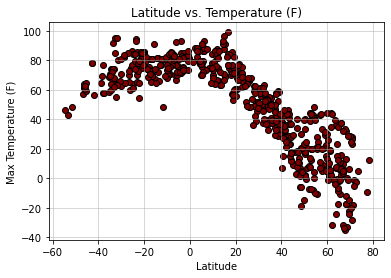

In [6]:
plt.scatter(city_data['Lat'], city_data['Max Temp'], facecolor='maroon', edgecolor = 'black')

plt.title("Latitude vs. Temperature (F)")

plt.xlabel("Latitude")

plt.ylabel("Max Temperature (F)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)


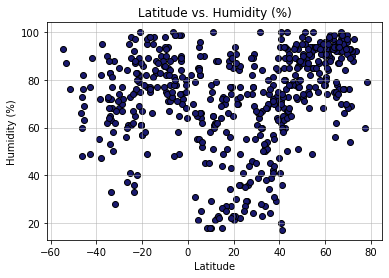

In [7]:
plt.scatter(city_data['Lat'], city_data['Humidity'], facecolor='midnightblue', edgecolor = 'black')

plt.title("Latitude vs. Humidity (%)")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

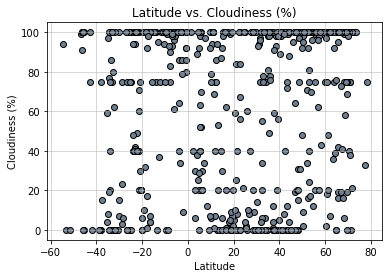

In [8]:
plt.scatter(city_data['Lat'], city_data['Cloudiness'], facecolor='slategrey', edgecolor = 'black')

plt.title("Latitude vs. Cloudiness (%)")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

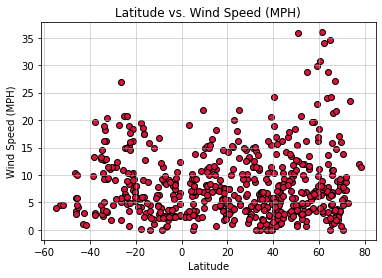

In [9]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'], facecolor='crimson', edgecolor = 'black')

plt.title("Latitude vs. Wind Speed (MPH)")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (MPH)")

plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)

In [15]:
northern_hemisphere = city_data.loc[city_data["Lat"] >= 0]
southern_hemisphere = city_data.loc[city_data["Lat"] < 0]

The r-squared is: 0.7717300950082345


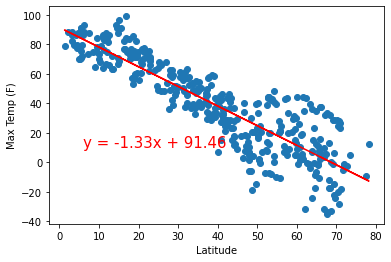

In [36]:

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.22858712582049703


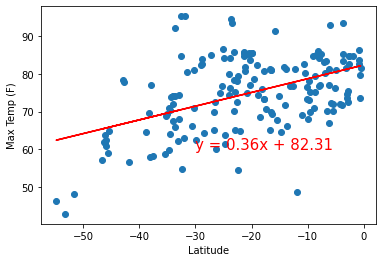

In [41]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.2667249963131784


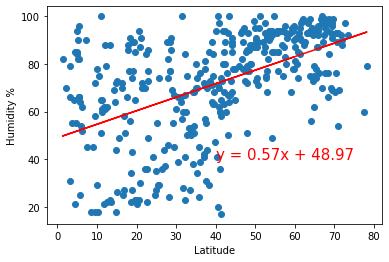

In [43]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.06867507470714172


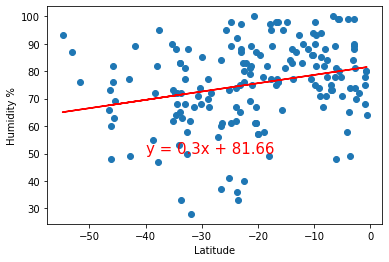

In [44]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.07976731847014479


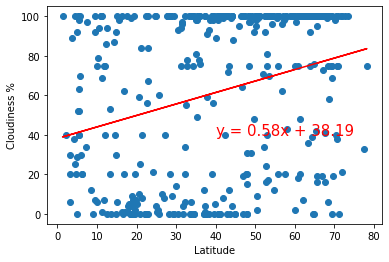

In [45]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.13074127202022032


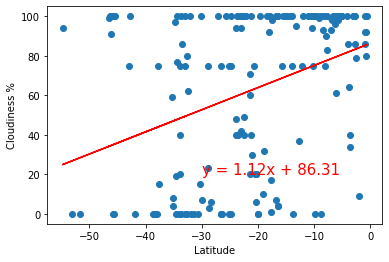

In [46]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.012402667351202356


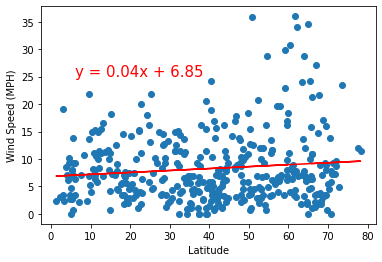

In [48]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.030167416335913525


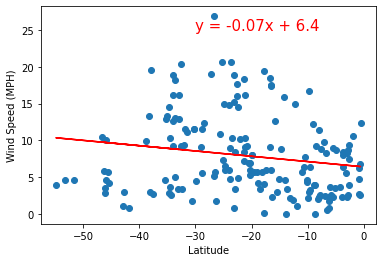

In [49]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")